In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [3]:
import json
db = json.load(open('../data/usda_food/database.json'))
len(db)
#使用json.load加载json数据

6636

In [5]:
type(db)
#我比较关心是什么类型 list类型

list

In [6]:
db[0].keys()
#先看有哪些属性项

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [8]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients
#可以看到在nutrients部分中也有group description和主键是重复的
#之后要后续操作

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [9]:
info_keys = ['description','group','id','manufacturer']
info = DataFrame(db,columns=info_keys)
info.head()
#选取四个属性出来

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [11]:
pd.value_counts(info.group)
#通过value_counts可以查看不同种类的数量

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

In [25]:
nutrients = []

#由于是个表中表结构 所以要循环处理（Maybe）
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients,ignore_index=True)
#合理
#把nutrients单独拉出一个表

In [14]:
nutrients.duplicated().value_counts()
#有大量重复

False    375176
True      14179
dtype: int64

In [26]:
nutrients.drop_duplicates()

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [21]:
col_mapping = {'description':'food','group':'fgroup'}
info = info.rename(columns=col_mapping,copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [27]:
col_mapping2 = {'description':'nutrient','group':'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping2,copy=False)
nutrients
#由于是重复的group 和 description 字段
#所以两次重命名

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [29]:
ndata = pd.merge(nutrients,info,how='outer',on='id')
ndata

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
389351,0.000,mg,Cholesterol,Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
389352,0.072,g,"Fatty acids, total saturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


In [30]:
ndata.iloc[30000]

value                                                         473
units                                                     mcg_RAE
nutrient                                           Vitamin A, RAE
nutgroup                                                 Vitamins
id                                                           3950
food            Infant formula, ABBOTT NUTRITION, SIMILAC, ADV...
fgroup                                                 Baby Foods
manufacturer                                                 None
Name: 30000, dtype: object

In [34]:
# 未来两章的内容 可视化 聚合等
ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)
# result['Zinc Zn'].order().plot(kind='barh')

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.107
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

In [35]:
ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)['Zinc, Zn']


fgroup
Baby Foods                           0.590
Baked Products                       0.660
Beef Products                        5.390
Beverages                            0.040
Breakfast Cereals                    2.885
Cereal Grains and Pasta              1.090
Dairy and Egg Products               1.330
Ethnic Foods                         1.045
Fast Foods                           1.250
Fats and Oils                        0.020
Finfish and Shellfish Products       0.670
Fruits and Fruit Juices              0.100
Lamb, Veal, and Game Products        3.940
Legumes and Legume Products          1.140
Meals, Entrees, and Sidedishes       0.630
Nut and Seed Products                3.290
Pork Products                        2.320
Poultry Products                     2.500
Restaurant Foods                     0.800
Sausages and Luncheon Meats          2.130
Snacks                               1.470
Soups, Sauces, and Gravies           0.200
Spices and Herbs                     2.750
Swee

<AxesSubplot:ylabel='fgroup'>

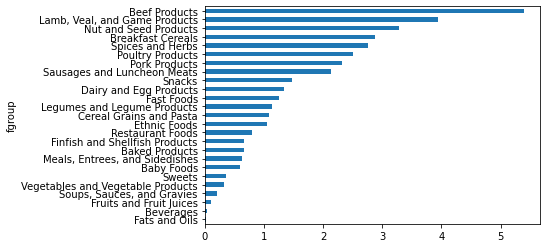

In [41]:
result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [42]:
by_nutrient = ndata.groupby(['nutgroup','nutrient'])
get_max = lambda x:x.xs(x.value.idxmax())
get_min = lambda x:x.xs(x.value.idmin())

In [43]:
max_food = by_nutrient.apply(get_max)[['value','food']]
max_food

value  \
nutgroup    nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
            Cystine                          1.307   
            Glutamic acid                   17.452   
...                                            ...   
Vitamins    Vitamin D2 (ergocalciferol)     28.100   
            Vitamin D3 (cholecalciferol)    27.400   
            Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                       food  
nutgroup    nutrient                                                                         
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened  
            Arginine                                           Seeds, sesame flour, low-fat  
            Aspartic acid                                               Soy protein isolate  
            Cystine                            Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                               Soy protein isolate  
...                                                                                     ...  
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw  
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw  
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...  
            Vitamin K (phylloquinone)                                  Spices, sage, ground  

[94 rows x 2 columns]

In [45]:
max_food.food = max_food.food.str[:50]
max_food

value  \
nutgroup    nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
            Cystine                          1.307   
            Glutamic acid                   17.452   
...                                            ...   
Vitamins    Vitamin D2 (ergocalciferol)     28.100   
            Vitamin D3 (cholecalciferol)    27.400   
            Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                       food  
nutgroup    nutrient                                                                         
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened  
            Arginine                                           Seeds, sesame flour, low-fat  
            Aspartic acid                                               Soy protein isolate  
            Cystine                            Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                               Soy protein isolate  
...                                                                                     ...  
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw  
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw  
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...  
            Vitamin K (phylloquinone)                                  Spices, sage, ground  

[94 rows x 2 columns]

In [46]:
max_food.loc['Amino Acids','food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 